In [4]:
import sys
import os
from copy import deepcopy

sys.path.append('..')
sys.path.append('../..')

from src.configs import *
from src.data.data_processor import DataProcessor

import torch
import numpy as np
import random

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

In [6]:
data_cfg = DataConfig(
        path=f"{PACKAGE_PATH}/Fall_2021_csv",
        output_path=f"{PACKAGE_PATH}/resources/datasets",
        # artificial_data_path=f"{PACKAGE_PATH}/artificial_hist",
        class_names=["cz_3",  "atlas_V",  "h2a", "globalstar"],
        regexes=[r'CZ-3B.*', r'ATLAS_[5|V]_CENTAUR_R_B$',  r'H-2A.*', r'GLOBALSTAR.*'],
        validation_split=0.2,
        split_strategy=SplitStrategy.TRACK_ID,
        number_of_training_examples_per_class=100_000,
        filter_config=FilterConfig(n_bins=30, n_gaps= 3, gap_size=5, rms_ratio= 0., non_zero_ratio=0.8),
        # filter_config=None,
        data_types=[DataType.LC],
        wavelet_start_scale=1,
        wavelet_scales_step=1,
        wavelet_end_scale=5,
        wavelet_name= 'gaus1',
        lc_shifts = 0,
        convert_to_mag=False,
        train_augmentations=[],
)

In [7]:
dp = DataProcessor(data_cfg)

Hash: a5ad2d9cc4b1b7dc9800e732673722b4


In [9]:
data = dp._read_csv_files(data_cfg.path)

['cz_3', 'atlas_V', 'h2a', 'globalstar']


100%|██████████| 431/431 [00:01<00:00, 292.57it/s]

1 cz_3
Loaded 26624 examples for class cz_3
2 atlas_V
Loaded 16707 examples for class atlas_V
2 h2a
Loaded 5863 examples for class h2a
31 globalstar
Loaded 42174 examples for class globalstar


In [13]:
for x in data[0]:
    print(x, len(data[0][x]))

cz_3 26624
atlas_V 16707
h2a 5863
globalstar 42174


In [18]:
def non_zero_ratio(data):
    ok = (np.sum(data!=0, axis=1) / 300) > 0.8
    return data[ok]

X = data[0]
for x in X:
    X[x] = non_zero_ratio(X[x])
    print(x, len(X[x]))

cz_3 10102
atlas_V 2733
h2a 2395
globalstar 4351


(2.0, 8.0)

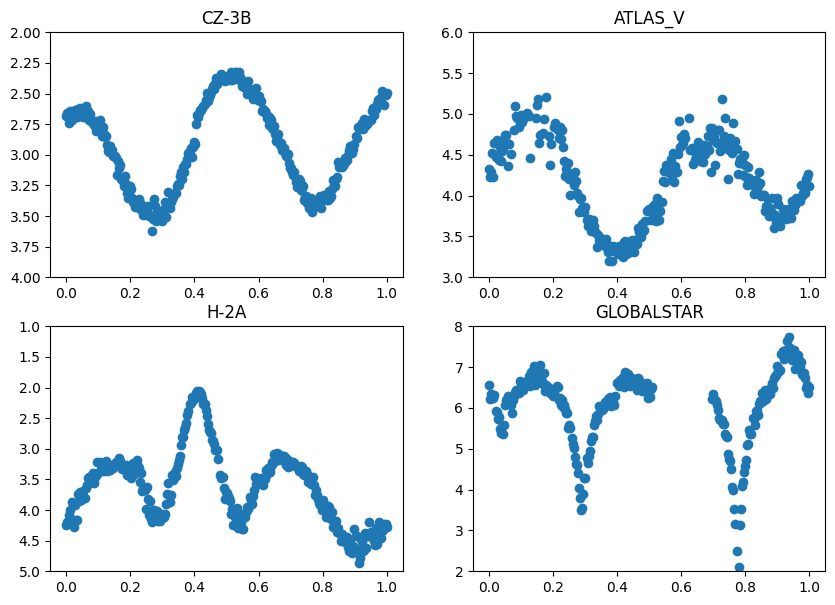

In [40]:
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 300)
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

axs[0,0].scatter(t,  X['cz_3'][0, :], label='CZ-3B')
axs[0,0].set_title('CZ-3B')
axs[0,0].set_ylim(4,2)
d = X["atlas_V"][0, :]
axs[0,1].scatter(t[d!=0], d[d!=0],  label='ATLAS_V')
axs[0,1].set_title('ATLAS_V')
axs[0,1].set_ylim(3,6)
d = X["h2a"][10, :]
axs[1,0].scatter(t[d!=0],  d[d!=0], label='H-2A')
axs[1,0].set_title('H-2A')
axs[1,0].set_ylim(5,1)
d = X["globalstar"][10, :]
axs[1,1].scatter(t[d!=0],  d[d!=0], label='GLOBALSTAR')
axs[1,1].set_title('GLOBALSTAR')    
axs[1,1].set_ylim(2,8)

<class 'numpy.bool_'>
<class 'numpy.bool_'>
<class 'numpy.bool_'>
<class 'numpy.bool_'>


Text(0.5, 1.0, 'TSNE - Light Curve')

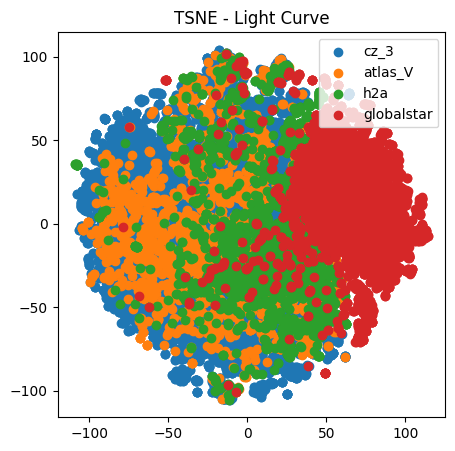

In [38]:
from sklearn.manifold import TSNE


XX = np.concatenate([X["cz_3"], X["atlas_V"], X["h2a"], X["globalstar"]], axis=0)
yy = np.concatenate([np.zeros(len(X["cz_3"])), np.ones(len(X["atlas_V"])), 2*np.ones(len(X["h2a"])), 3*np.ones(len(X["globalstar"]))], axis=0)

# N = 10_000
reduced_data = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5).fit_transform(XX, yy)

fig = plt.figure(figsize=(5, 5))
# ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot()

for l in np.unique(yy):
    ok = yy == l
    print(type(ok[0]))
    # create 3D scatter plot
    plt.scatter(reduced_data[ok, 0], reduced_data[ok, 1], label=data_cfg.class_names[int(l)])
    # ax.scatter(reduced_data[ok, 0], reduced_data[ok, 1], reduced_data[ok, 2], label=cfg.data_config.labels[l])
plt.legend()
plt.title("TSNE - Light Curve")
# fig.savefig(f"TSNE_LC.png")

<class 'numpy.bool_'>
<class 'numpy.bool_'>
<class 'numpy.bool_'>


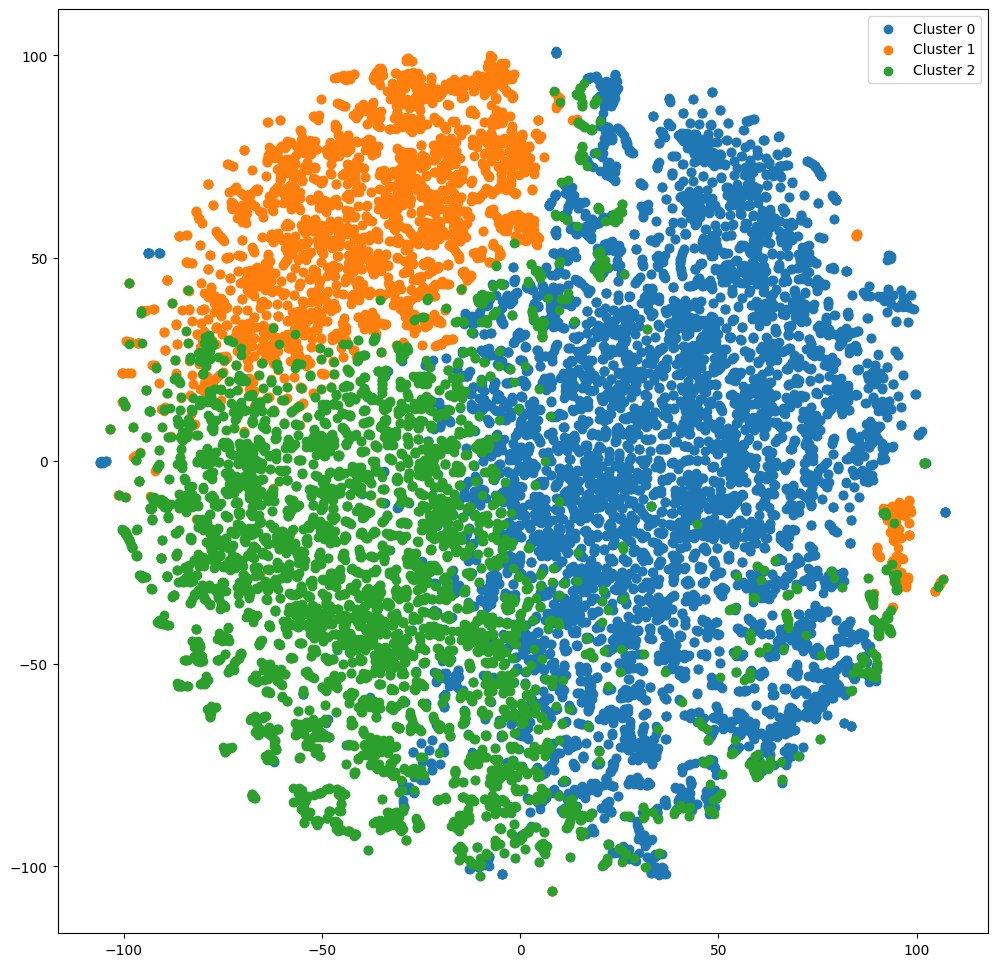

In [37]:
# k means clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(XX)

# plot results
fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot()

for l in np.unique(kmeans.labels_):
    ok = kmeans.labels_ == l
    print(type(ok[0]))
    # create 3D scatter plot
    plt.scatter(reduced_data[ok, 0], reduced_data[ok, 1], label=f'Cluster {l}')
    # ax.scatter(reduced_data[ok, 0], reduced_data[ok, 1], reduced_data[ok, 2], label=cfg.data_config.labels[l])

plt.legend()




